# Designing IIR Band Pass Butterworth Filter

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

## Define shape and generate filter coefficients

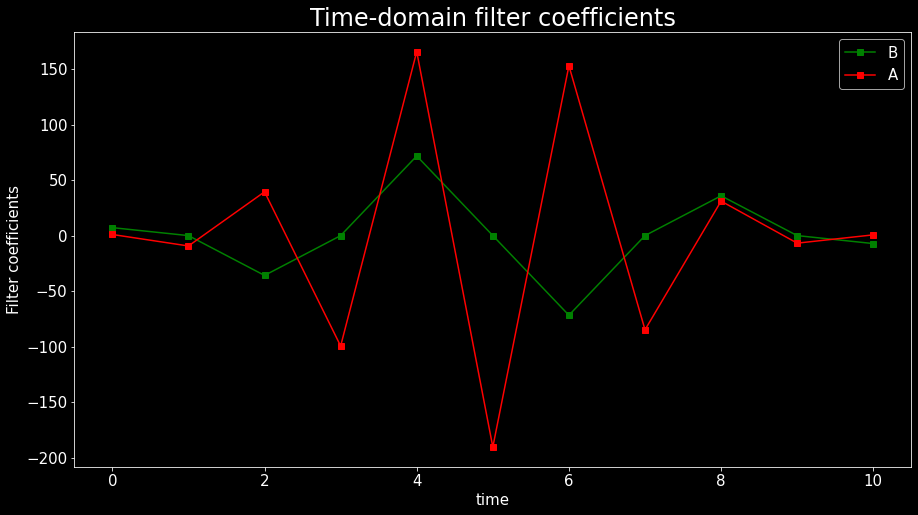

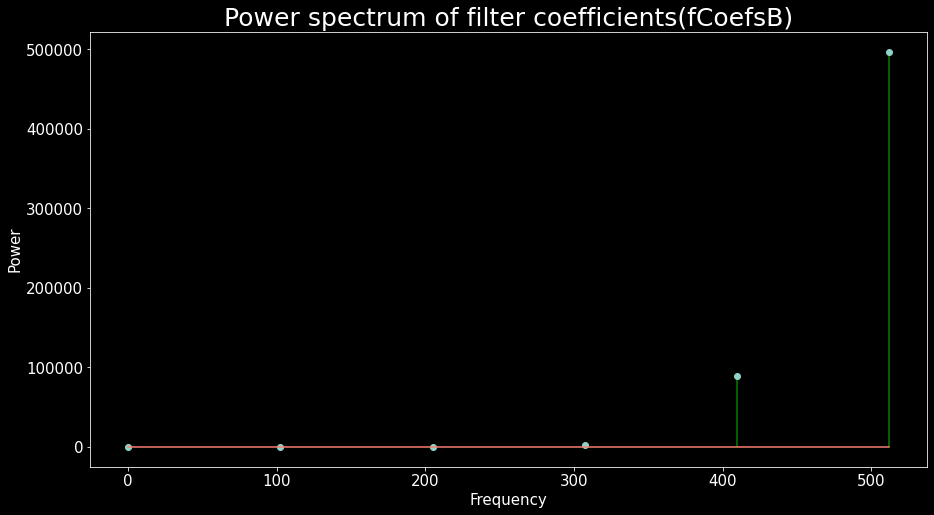

In [22]:
# IIR Filters are good for online filtering because they are speedy due to their small orders. However in comparison FIR filter
#is better because it has large data samples and order and is stable because filtering does not involve the samples from 
# previous samples.

# filter parameters
srate   = 1024 # hz
Nyquist = srate/2
cutoff  = [30,50]

desired_shape = [0,0,1,1,0,0]
frquencies = [0,cutoff[0],cutoff[0],cutoff[1],cutoff[1],Nyquist]

# create filter coefficients. They don't need shape and transition width as input.

fCoefsB,fCoefsA = signal.butter(5,np.array(cutoff)/Nyquist,btype='bandpass') # Here 5 is the order of the filter.

# We can observe the order is very less in IIR Filters than in FIR.
# fCoefsB are the previous values of the original signal, fCoefsA is the
# previous values of already filtered signal. fCoefsB are very small as
# compared to thefCoefsA.

# plotting
plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(fCoefsB*1e7,'gs-',label='B')
plt.plot(fCoefsA,'rs-',label='A')
plt.xlabel('time', fontsize = 15)
plt.ylabel('Filter coefficients', fontsize =15)
plt.title('Time-domain filter coefficients', fontsize = 24)
plt.legend(fontsize = 15)
plt.show()


# power spectrum of filter coefficients

filt_power = np.abs(scipy.fft.fft(fCoefsA))**2
Hz = np.linspace(0,Nyquist,int(np.floor(len(fCoefsB)/2)+1))



plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.stem(Hz,filt_power[0:len(Hz)],'gs-')
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.title('Power spectrum of filter coefficients(fCoefsB)', fontsize = 25)
plt.show()


## Impulse response of IIR Filter

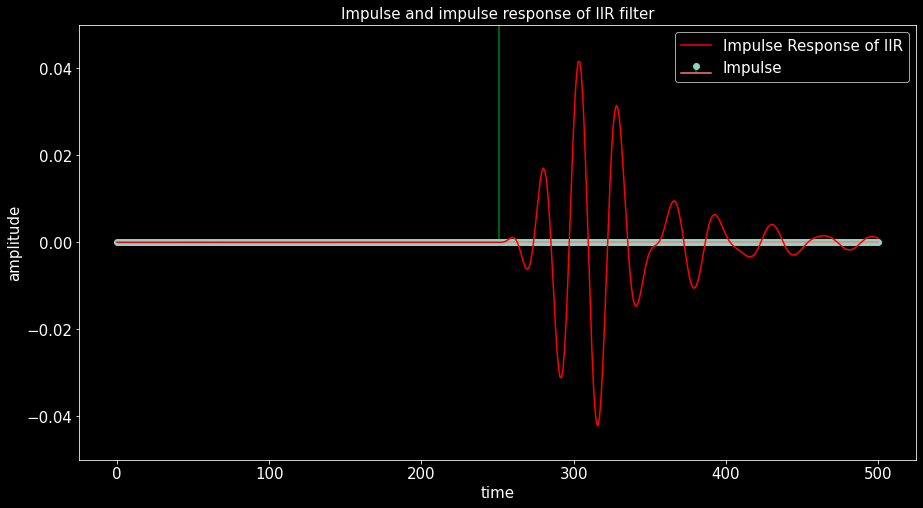

In [23]:
# generate the impulse

impulse = np.zeros(501)
impulse[251] = 1

# Find the impulse response of IIR filter with  fCoefsB and fCoefsA.

impulse_res = signal.lfilter(fCoefsB,fCoefsA,impulse)

plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.stem(np.arange(0,len(impulse)),impulse,'g',label='Impulse')
plt.plot(impulse_res,'r',label='Impulse Response of IIR')
plt.ylim([-.05,.05])
plt.legend(fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.ylabel('amplitude', fontsize =15)
plt.title('Impulse and impulse response of IIR filter', fontsize = 15)
plt.show()

# Evaluate IIR Filter by computing power spectrum of the impulse response

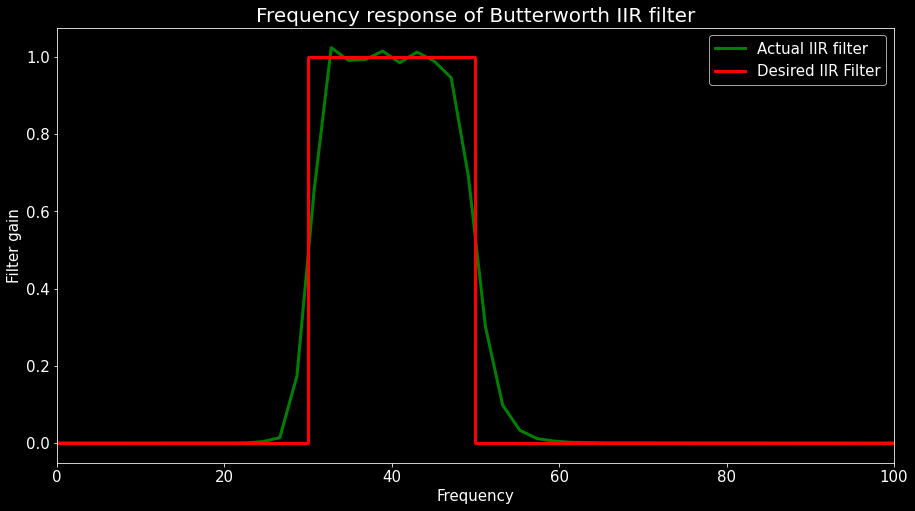

In [24]:
f_impulse = np.abs(scipy.fft.fft(impulse_res))**2    # FFT of the impulse response of the IIR filter 

Hz = np.linspace(0,Nyquist,int(np.floor(len(impulse)/2)+1))


plt.figure(figsize = (15,8)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,f_impulse[0:len(Hz)],'g',linewidth =3, label = 'Actual IIR filter')
plt.plot([0,cutoff[0],cutoff[0],cutoff[1],cutoff[1],Nyquist],[0,0,1,1,0,0],'r',linewidth =3, label = 'Desired IIR Filter')
plt.xlim([0,100])
plt.xlabel('Frequency', fontsize =15)
plt.ylabel('Filter gain', fontsize =15)
plt.title('Frequency response of Butterworth IIR filter', fontsize =20)
plt.legend(fontsize =15)
plt.show()




# Low pass Butterworth IIR Filter

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

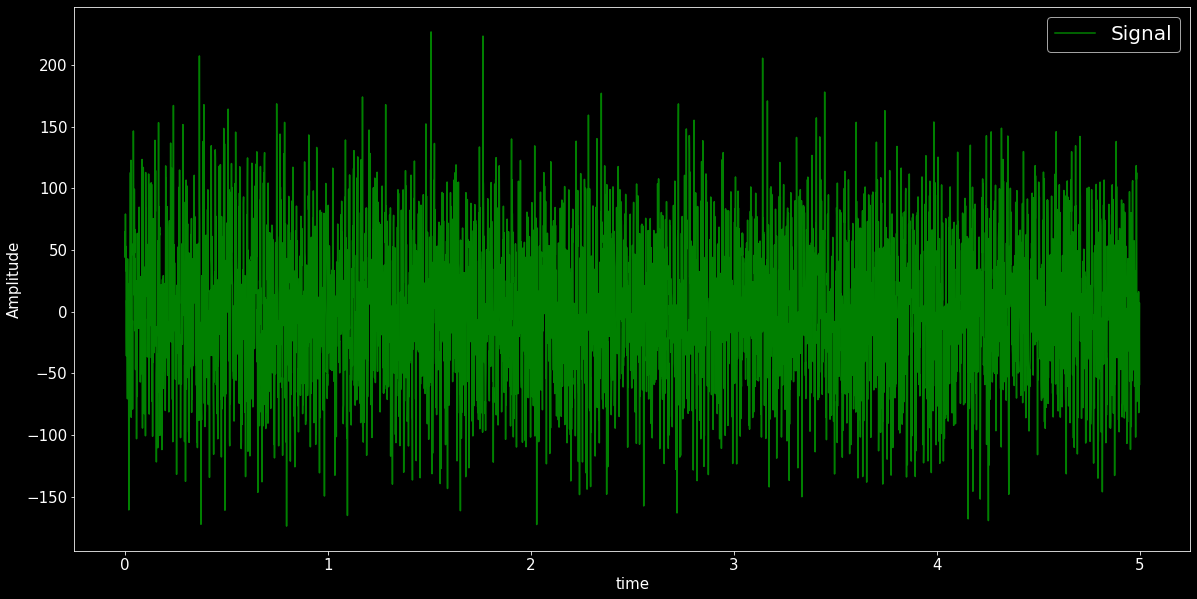

In [26]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,5,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = 40 * np.sin(2*np.pi*50*t)

noise =  50 * np.random.randn(pnts)

Nsignal     =   x + noise


plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Time domain Low pass IIR filter')

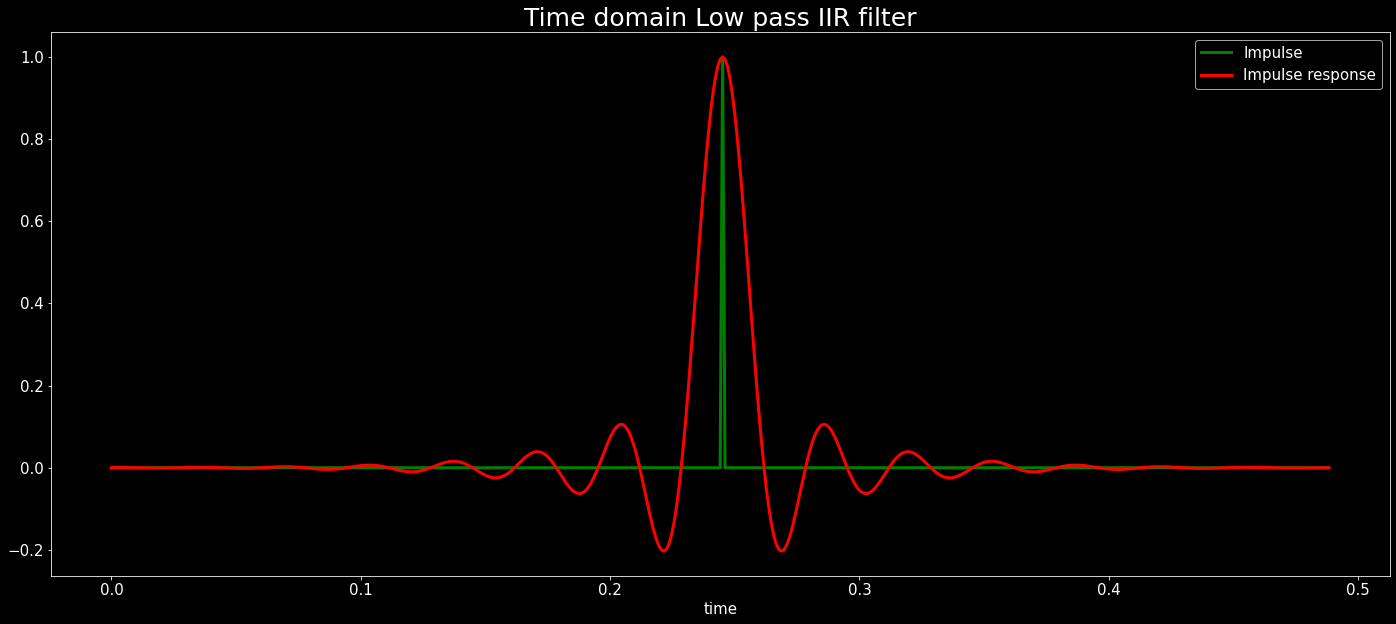

In [27]:
# Low pass filter


cutoff = 30

# generate filter coefficients (Butterworth)
fCoefsB,fCoefsA = signal.butter(11,cutoff/Nyquist,btype='low')

# Evaluste the filter

impulse  = np.zeros(501)
impulse[251] = 1
impulse_res = signal.filtfilt(fCoefsB,fCoefsA,impulse)



# plotting
plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
impulse_time  = np.arange(0,len(impulse))/srate
plt.plot(impulse_time,impulse,'g',linewidth =3,label='Impulse')
plt.plot(impulse_time,impulse_res/np.max(impulse_res),'r',linewidth =3,label='Impulse response')
plt.xlabel('time', fontsize =15)
plt.legend(fontsize =15)
plt.title('Time domain Low pass IIR filter', fontsize =25)
 



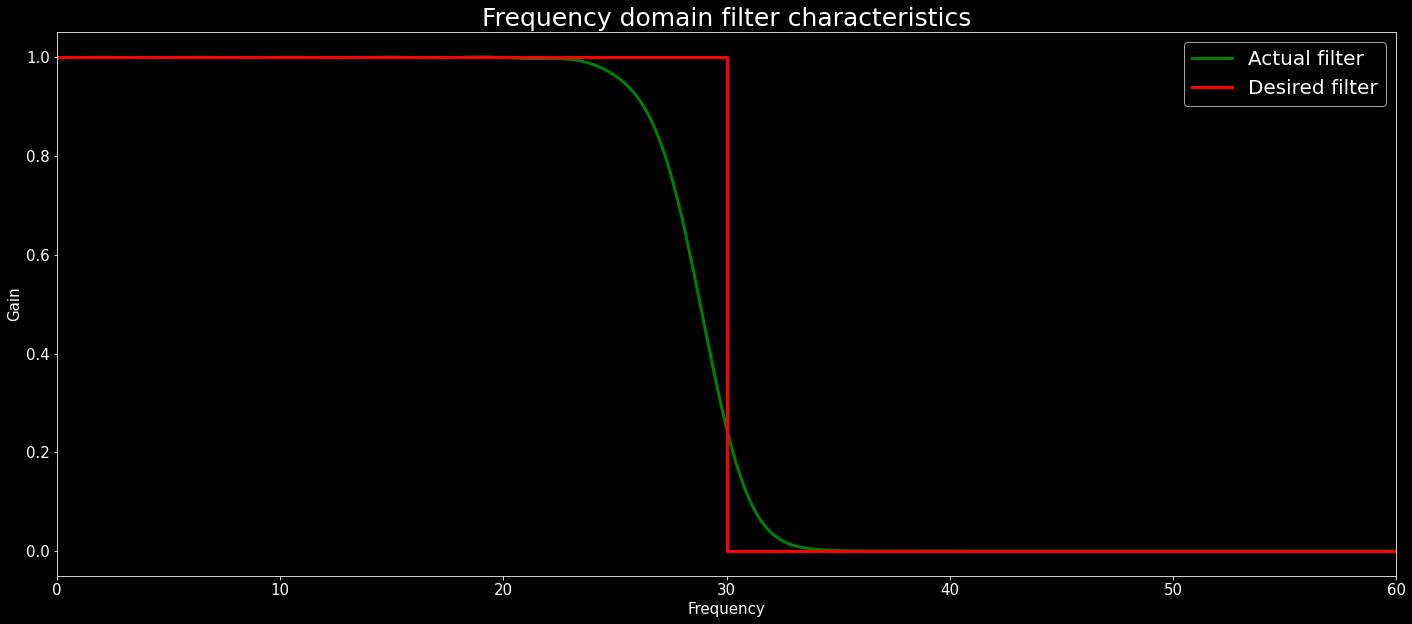

In [28]:
# Find power spectrum

f_impulse = np.abs(scipy.fft.fft(impulse_res,pnts))**2
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))

plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.plot(Hz,f_impulse[:len(Hz)],'g',linewidth =3,label = 'Actual filter')
plt.plot([0,cutoff,cutoff, Nyquist],[1,1,0,0],'r',linewidth =3, label = 'Desired filter')
plt.xlim([0,60])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize =15)
plt.title('Frequency domain filter characteristics', fontsize = 25)
plt.legend(fontsize =20)
plt.show()

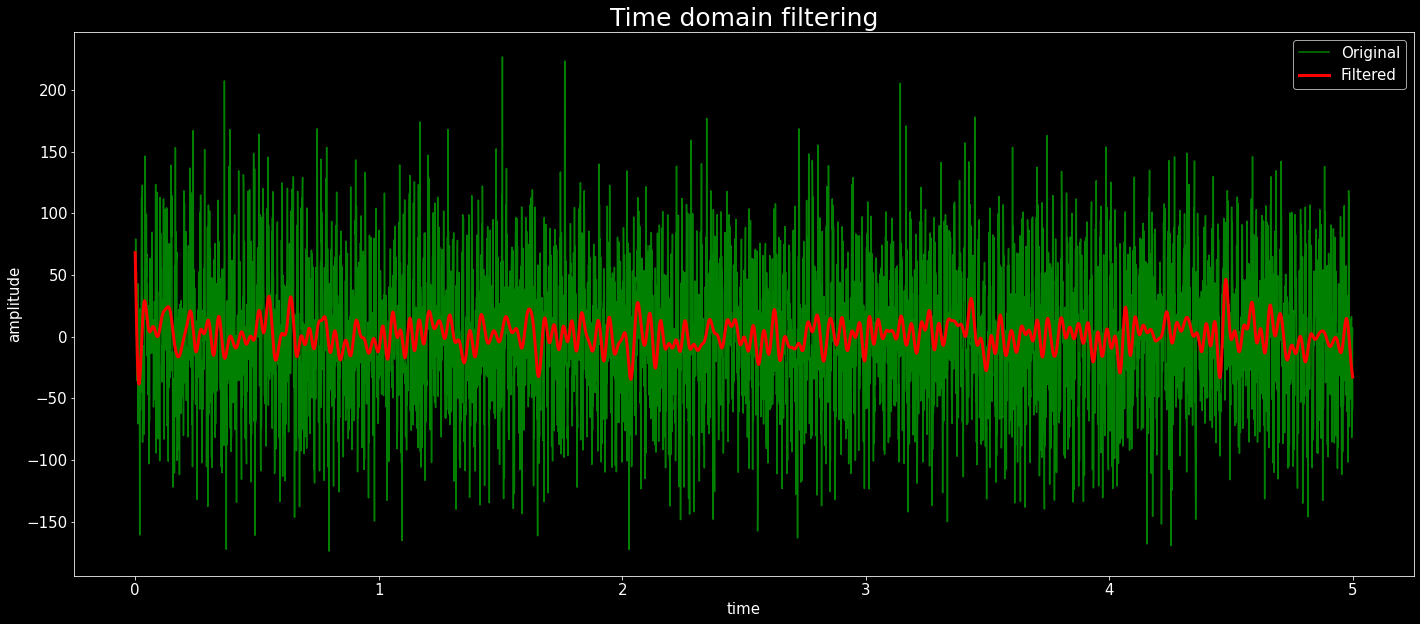

In [29]:
# Filtering the data in time domain

filt_sig = signal.filtfilt(fCoefsB,fCoefsA,Nsignal)

plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g',label='Original')
plt.plot(t,filt_sig,'r',linewidth=3,label='Filtered')
plt.xlabel('time', fontsize =15)
plt.ylabel('amplitude' , fontsize =15)
plt.title('Time domain filtering', fontsize =25)
plt.legend(fontsize =15)
plt.show()

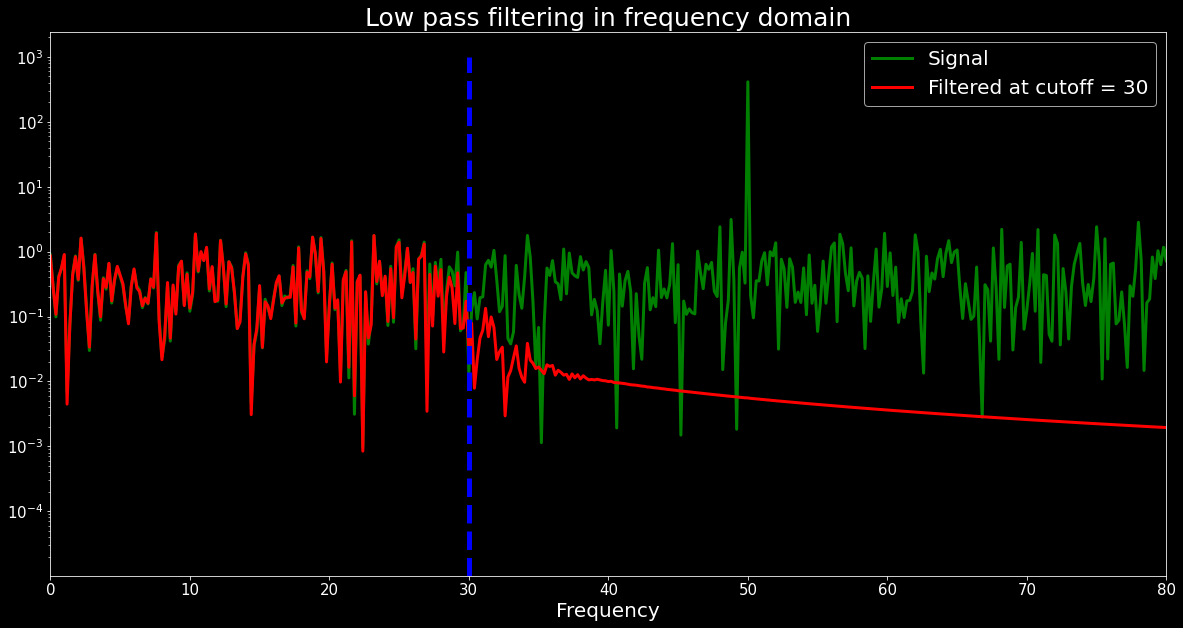

In [30]:
# Frequency domain filtering.

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
filt_sigX = np.abs(scipy.fft.fft(filt_sig)/pnts)**2

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g',linewidth =3,label='Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth =3,label='Filtered at cutoff = 30')
plt.plot([cutoff,cutoff],[0,1000],'b--',linewidth =5)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.title('Low pass filtering in frequency domain', fontsize = 25)
plt.show()

# High pass Butterworth IIR Filter

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

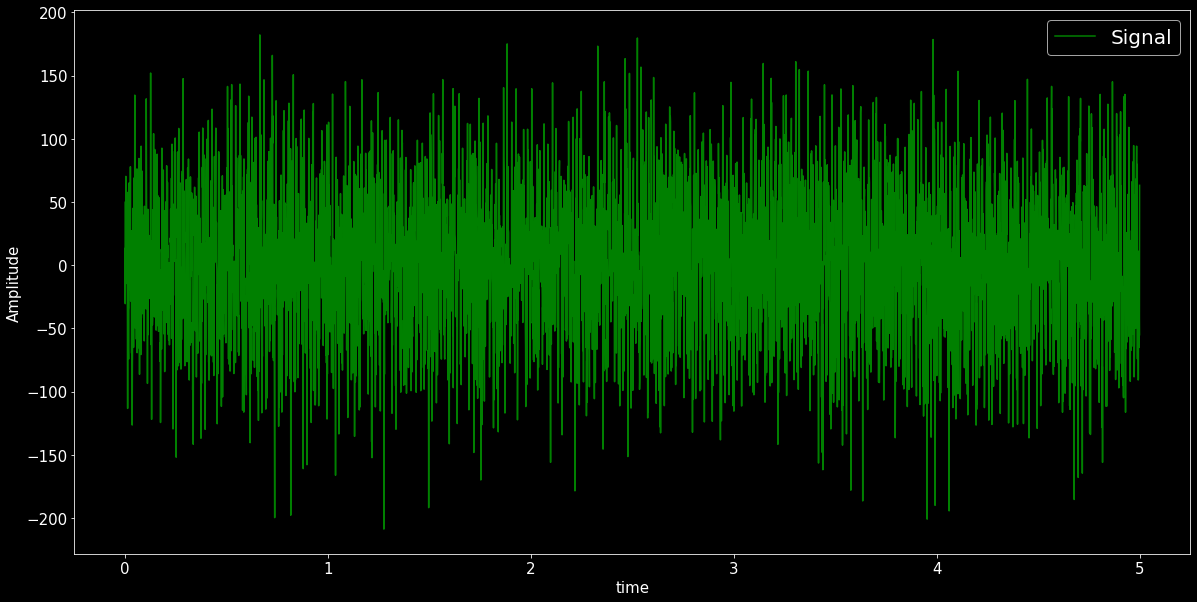

In [32]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,5,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = 40 * np.sin(2*np.pi*50*t)
noise =  50 * np.random.randn(pnts)
Nsignal     =   x + noise


plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Time domain high pass IIR filter')

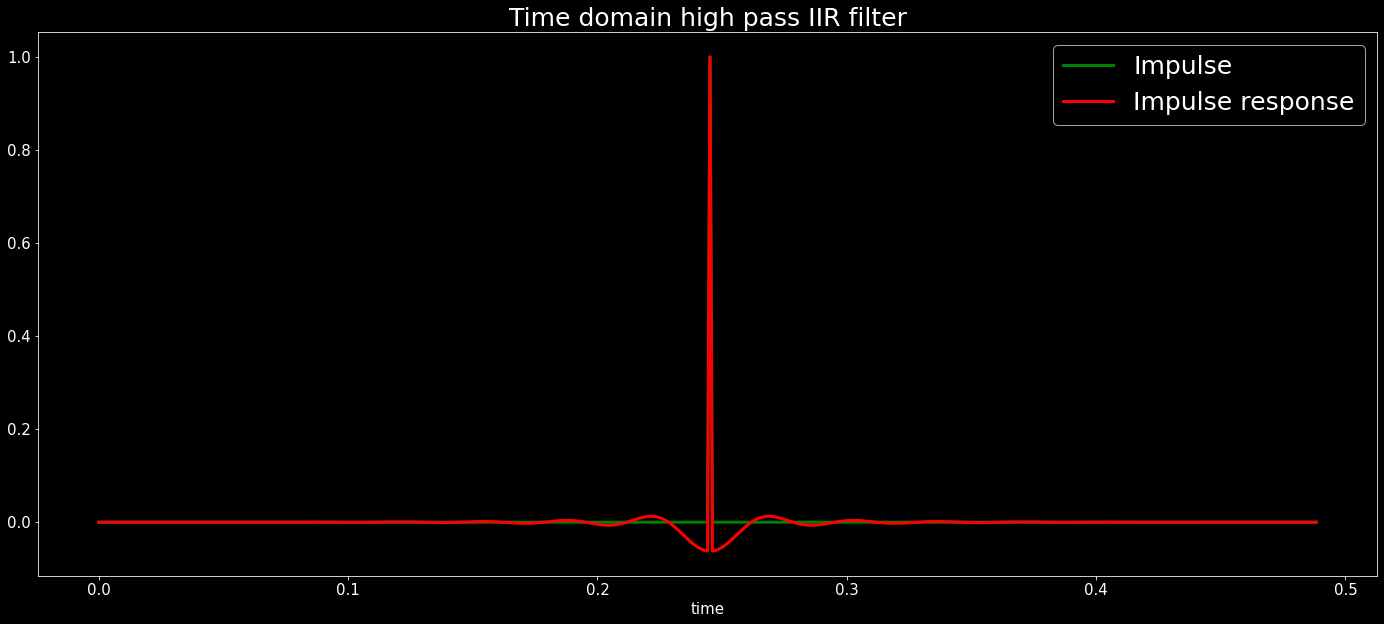

In [33]:
# High pass filter


cutoff = 30

# generate filter coefficients (Butterworth)
fCoefsB,fCoefsA = signal.butter(11,cutoff/Nyquist,btype='high')

# Evaluste the filter

impulse  = np.zeros(501)
impulse[251] = 1
impulse_res = signal.filtfilt(fCoefsB,fCoefsA,impulse)



# plotting
plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
impulse_time  = np.arange(0,len(impulse))/srate
plt.plot(impulse_time,impulse,'g',linewidth = 3,label='Impulse')
plt.plot(impulse_time,impulse_res/np.max(impulse_res),'r',linewidth =3,label='Impulse response')
plt.xlabel('time', fontsize =15)
plt.legend(fontsize =25)
plt.title('Time domain high pass IIR filter', fontsize = 25)
 


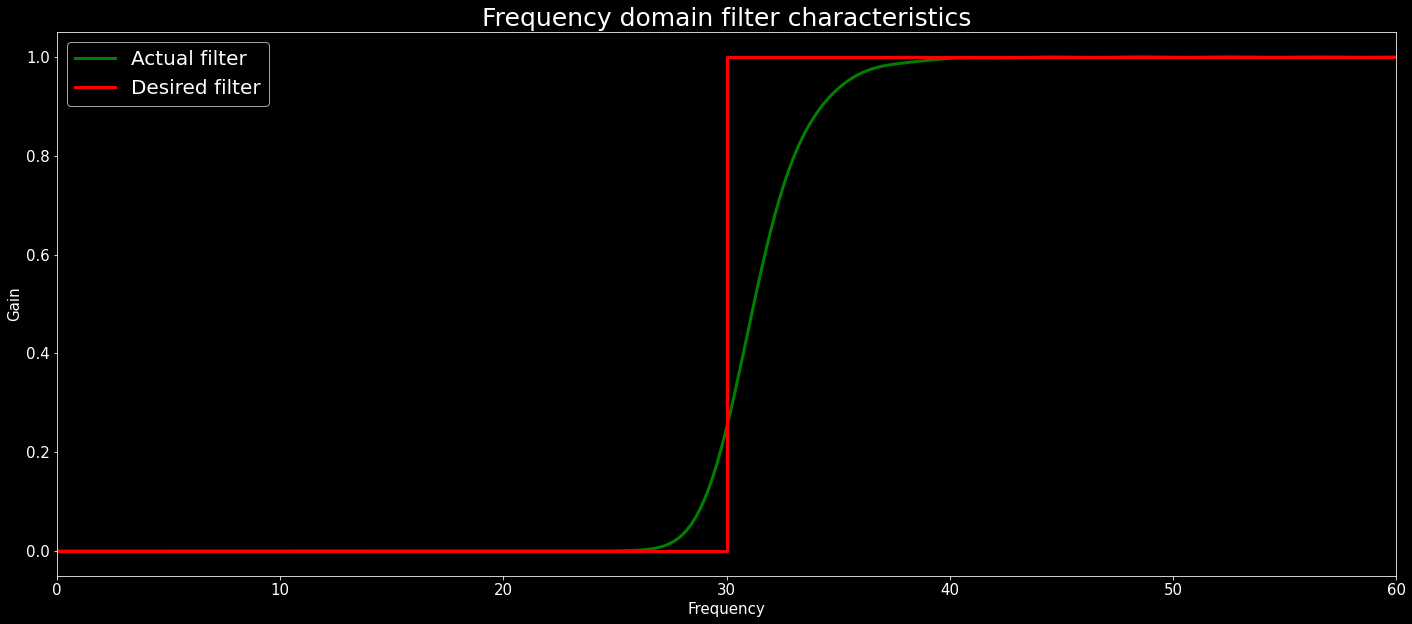

In [34]:
# Find power spectrum

f_impulse = np.abs(scipy.fft.fft(impulse_res,pnts))**2
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))

plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,f_impulse[:len(Hz)],'g',linewidth =3,label = 'Actual filter')
plt.plot([0,cutoff,cutoff, Nyquist],[0, 0, 1, 1],'r',linewidth =3, label = 'Desired filter')
plt.xlim([0,60])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize =15)
plt.title('Frequency domain filter characteristics', fontsize = 25)
plt.legend(fontsize =20)
plt.show()

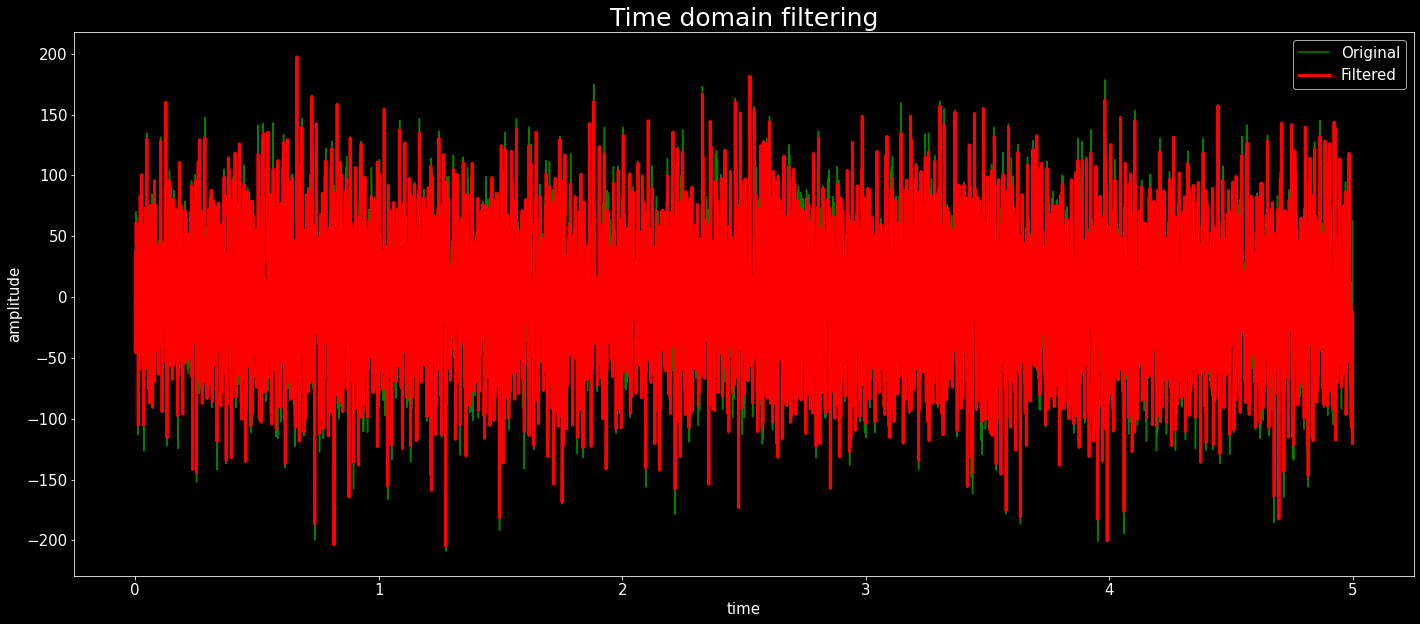

In [35]:
# Filtering the data in time domain

filt_sig = signal.filtfilt(fCoefsB,fCoefsA,Nsignal)

plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g',label='Original')
plt.plot(t,filt_sig,'r',linewidth=3,label='Filtered')
plt.xlabel('time', fontsize =15)
plt.ylabel('amplitude' , fontsize =15)
plt.title('Time domain filtering', fontsize =25)
plt.legend(fontsize =15)
plt.show()

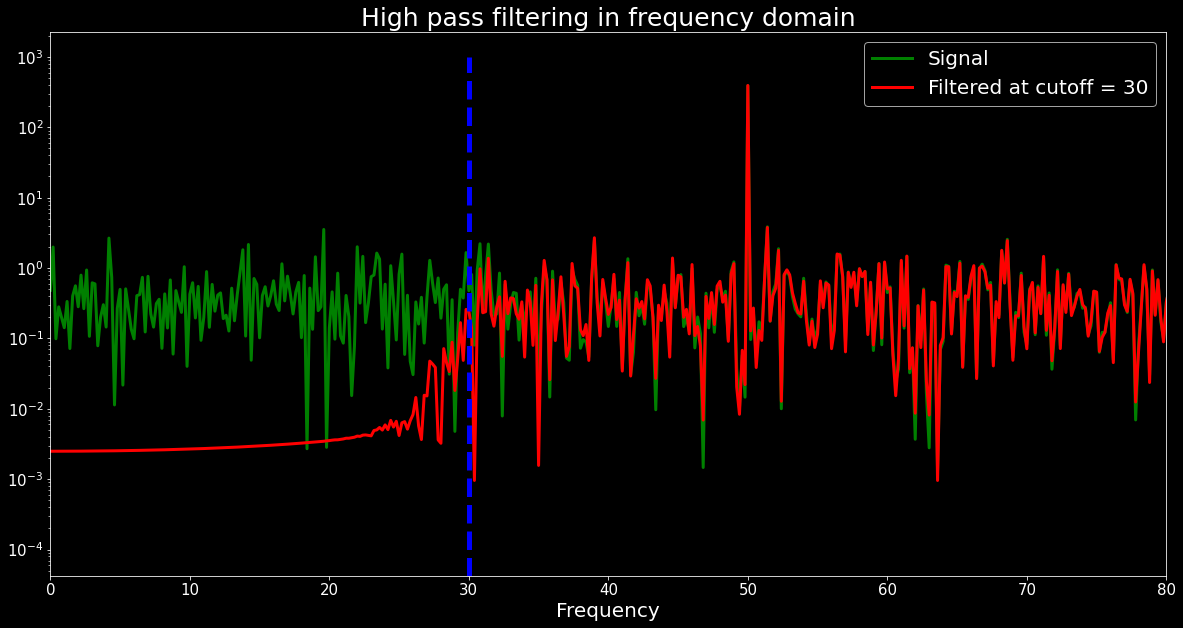

In [36]:
# Frequency domain filtering

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
filt_sigX = np.abs(scipy.fft.fft(filt_sig)/pnts)**2

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g',linewidth =3,label='Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth =3,label='Filtered at cutoff = 30')
plt.plot([cutoff,cutoff],[0,1000],'b--',linewidth =5)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.title('High pass filtering in frequency domain', fontsize = 25)
plt.show()


# Bandpass Butterworth IIR filter

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
from scipy import signal

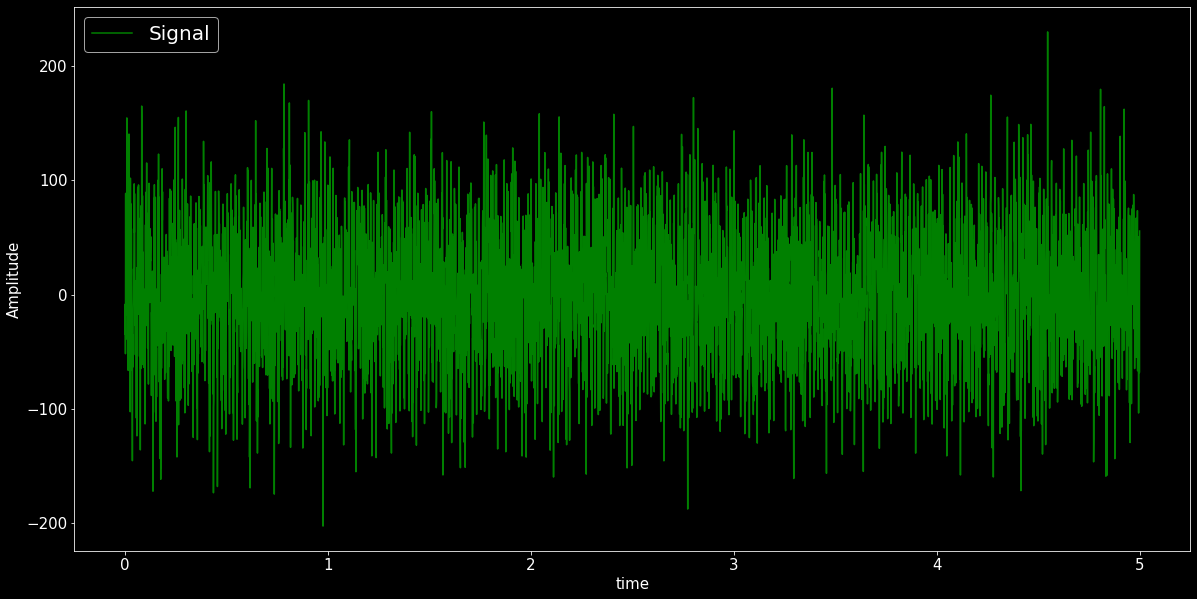

In [38]:
# Generating Signal

srate     = 1024 # hz
t = np.arange(0,5,1/srate)
pnts   = len(t)
Nyquist = srate/2

x = 40*np.sin(2*np.pi*50*t)
noise =  50*np.random.randn(pnts)
Nsignal     =   x + noise


plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g-',label='Signal')
plt.legend(fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Time domain bandpass pass IIR filter')

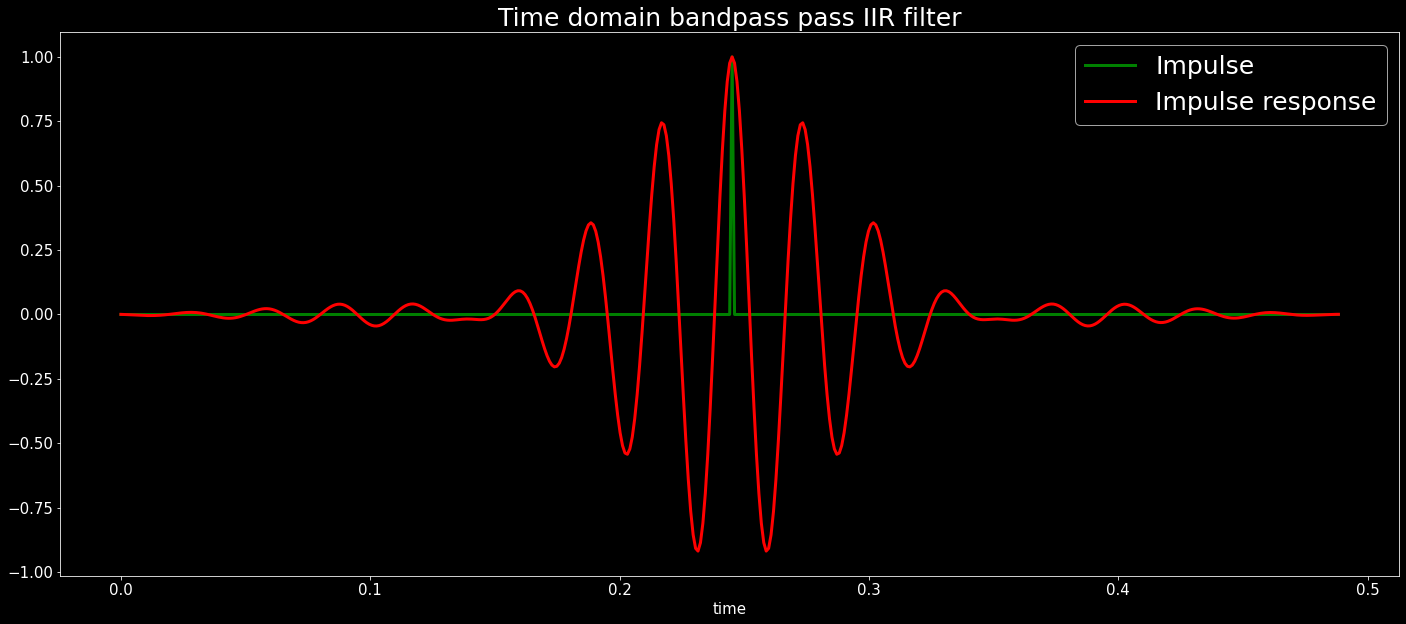

In [39]:
# Band pass filter


cutoff = [30,40]

# generate filter coefficients (Butterworth)
fCoefsB,fCoefsA = signal.butter(2, np.array(cutoff)/Nyquist, btype='bandpass')

# Evaluate the filter

impulse  = np.zeros(501)
impulse[251] = 1
impulse_res = signal.filtfilt(fCoefsB,fCoefsA,impulse)



# plotting
plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
impulse_time  = np.arange(0,len(impulse))/srate
plt.plot(impulse_time,impulse,'g',linewidth = 3,label='Impulse')
plt.plot(impulse_time,impulse_res/np.max(impulse_res),'r',linewidth =3,label='Impulse response')
plt.xlabel('time', fontsize =15)
plt.legend(fontsize =25)
plt.title('Time domain bandpass pass IIR filter', fontsize = 25)
 

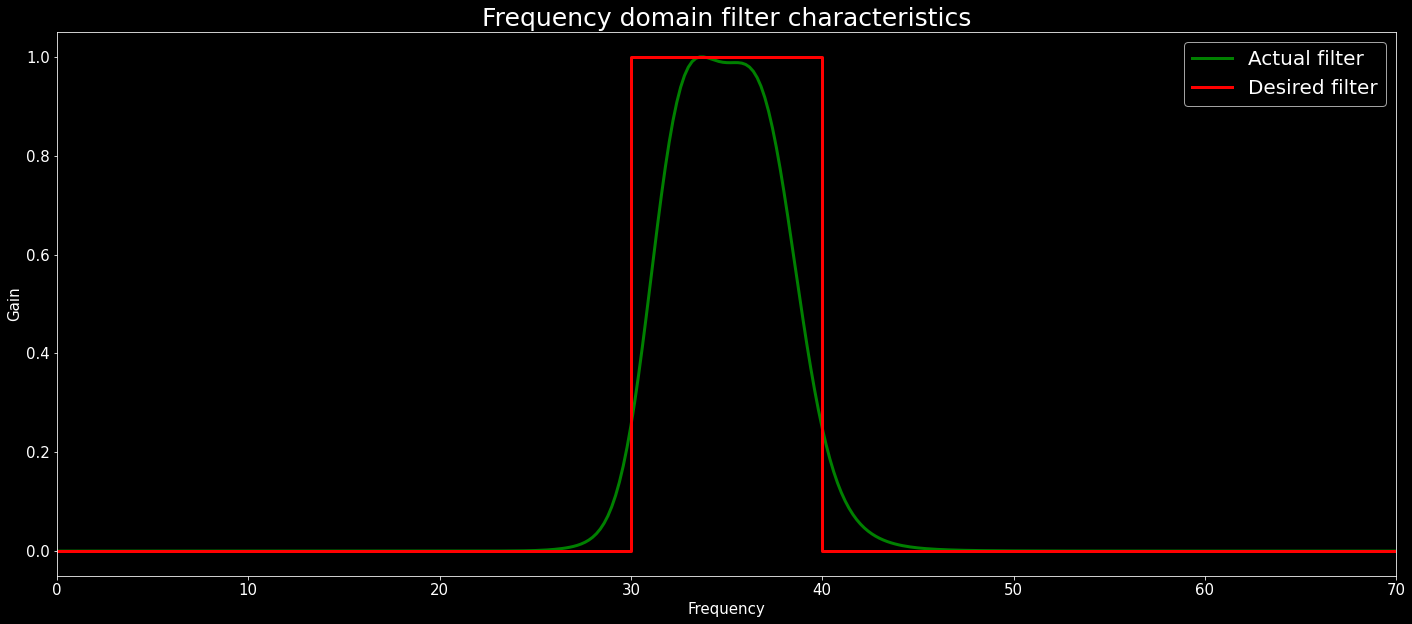

In [40]:
# Find power spectrum

f_impulse = np.abs(scipy.fft.fft(impulse_res,pnts))**2
Hz = np.linspace(0,Nyquist,int(np.floor(pnts/2)+1))

plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,f_impulse[0:len(Hz)]/max(f_impulse),'g',linewidth =3,label = 'Actual filter')
plt.plot([0,cutoff[0],cutoff[0],cutoff[1],cutoff[1], Nyquist],[0, 0, 1, 1, 0, 0],'r',linewidth =3, label = 'Desired filter')
plt.xlim([0,70])
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize =15)
plt.title('Frequency domain filter characteristics', fontsize = 25)
plt.legend(fontsize =20)
plt.show()

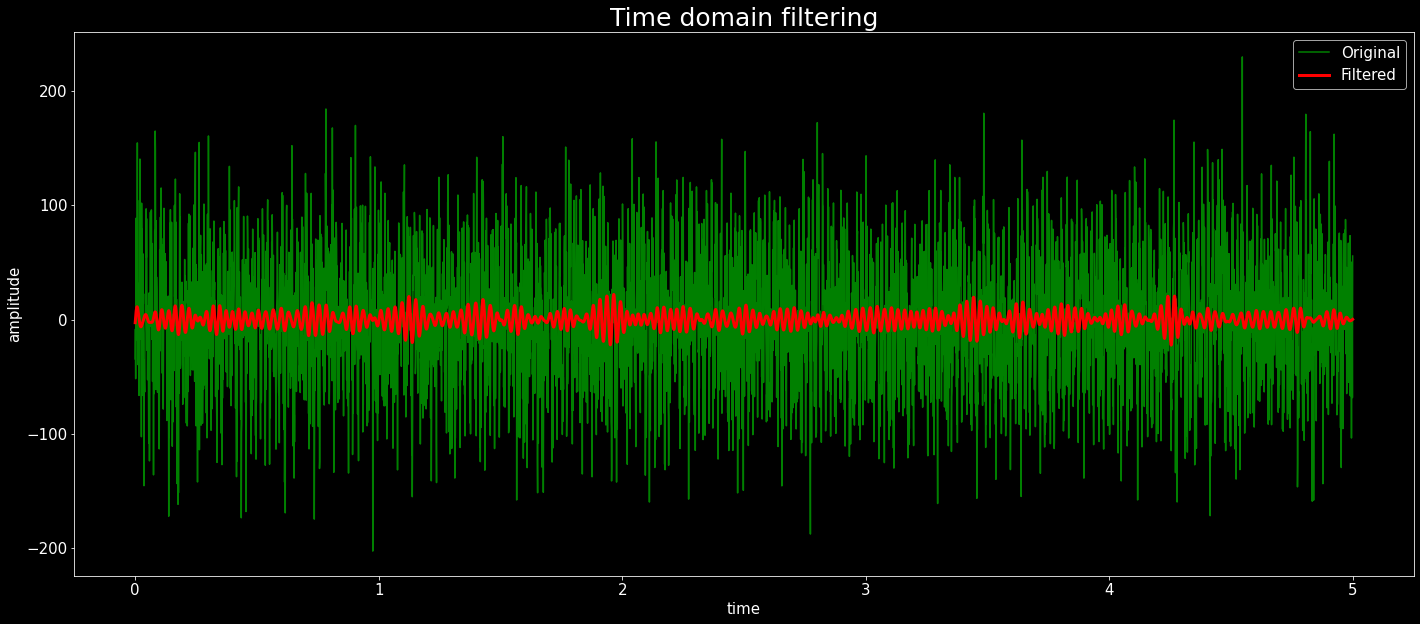

In [41]:
# Filtering the data in time domain

filt_sig = signal.filtfilt(fCoefsB,fCoefsA,Nsignal)

plt.figure(figsize = (24,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,Nsignal,'g',label='Original')
plt.plot(t,filt_sig,'r',linewidth=3,label='Filtered')
plt.xlabel('time', fontsize =15)
plt.ylabel('amplitude' , fontsize =15)
plt.title('Time domain filtering', fontsize =25)
plt.legend(fontsize =15)
plt.show()

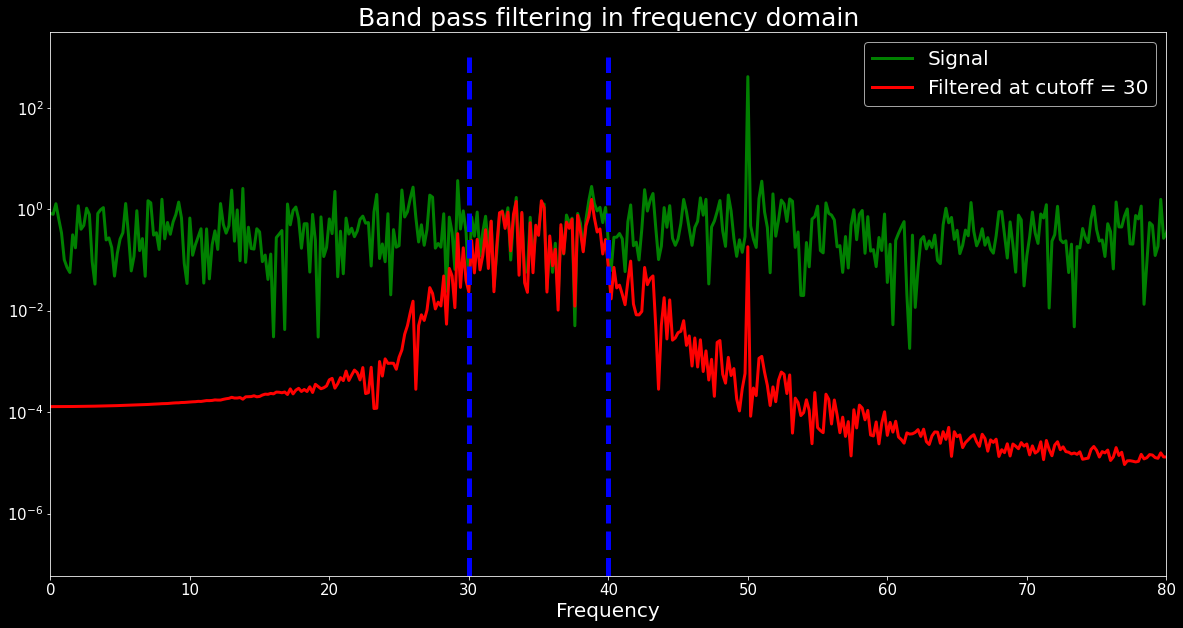

In [42]:
# Frequency domain filtering

NsignalX = np.abs(scipy.fft.fft(Nsignal)/pnts)**2
filt_sigX = np.abs(scipy.fft.fft(filt_sig)/pnts)**2

plt.figure(figsize = (20,10)) # set the size of figure
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(Hz,NsignalX[0:len(Hz)],'g',linewidth =3,label='Signal')
plt.plot(Hz,filt_sigX[0:len(Hz)],'r',linewidth =3,label='Filtered at cutoff = 30')
plt.plot([cutoff[0],cutoff[0]],[0,1000],'b--',linewidth =5)
plt.plot([cutoff[1],cutoff[1]],[0,1000],'b--',linewidth =5)
plt.xlim([0,80])
plt.yscale('log')
plt.legend(fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.title('Band pass filtering in frequency domain', fontsize = 25)
plt.show()